 <center><h1>Laptop Prices Project (Part 2)</h1>

In [1]:
# Here we will import the required packages.

import numpy as np 
import pandas as pd 
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import f_regression, SelectKBest
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV

This notebook is a continuation of Laptop Prices Project (Part 1).

We will load the training and test sets.

In [2]:
#Read files:

train = pd.read_csv("train_data_laptop.csv", delimiter=',', index_col=0)
test = pd.read_csv("test_data_laptop.csv", delimiter=',', index_col=0)

We will explore the training and test sets to make sure that no errors 
occurred when loading them into the new Python notebook.

In [3]:
train.shape

(1039, 29)

In [4]:
train.dtypes

Company                   object
TypeName                  object
Inches                   float64
Ram                       object
OpSys                     object
Weight (kg)              float64
Price_euros              float64
Brand                     object
Resolution                object
Pixel Width                int64
Pixel Height               int64
Total Pixels               int64
Pixel Density            float64
IPS Panel                   bool
Touchscreen                 bool
Cpu Clock Speed (GHz)    float64
Cpu Brand                 object
Simple Cpu Brand          object
Cpu Company               object
Memory Type               object
HDD Memory (GB)            int64
Hybrid Memory (GB)         int64
Flash Memory (GB)          int64
SSD Memory (GB)            int64
Total Memory (GB)          int64
Gpu Brand                 object
Simple Gpu Brand          object
Gpu Company               object
Simple OpSys              object
dtype: object

In [5]:
train.head()

,Company,TypeName,Inches,Ram,OpSys,Weight (kg),Price_euros,Brand,Resolution,Pixel Width,...,Memory Type,HDD Memory (GB),Hybrid Memory (GB),Flash Memory (GB),SSD Memory (GB),Total Memory (GB),Gpu Brand,Simple Gpu Brand,Gpu Company,Simple OpSys
1249,Dell,2 in 1 Convertible,13.3,8GB,Windows 10,1.24,1813.0,XPS,3200 x 1800,3200,...,SSD,0,0,0,256,256,Intel HD Graphics,Intel HD,Intel,Windows
1186,Dell,2 in 1 Convertible,15.6,16GB,Windows 10,2.09,1179.0,INSPIRON,1920 x 1080,1920,...,SSD,0,0,0,512,512,Intel HD Graphics,Intel HD,Intel,Windows
568,Lenovo,Notebook,15.6,4GB,Windows 10,2.20,344.0,IDEAPAD,1920 x 1080,1920,...,HDD,500,0,0,0,500,Intel HD Graphics,Intel HD,Intel,Windows
1251,HP,Notebook,15.6,4GB,Windows 10,1.86,399.0,255,1366 x 768,1366,...,HDD,500,0,0,0,500,AMD Radeon R4,AMD Radeon,AMD,Windows
491,Toshiba,Ultrabook,13.3,32GB,Windows 10,1.05,2799.0,PORTEGE,1920 x 1080,1920,...,SSD,0,0,0,512,512,Intel HD Graphics,Intel HD,Intel,Windows


In [6]:
test.shape

(261, 29)

In [7]:
test.dtypes

Company                   object
TypeName                  object
Inches                   float64
Ram                       object
OpSys                     object
Weight (kg)              float64
Price_euros              float64
Brand                     object
Resolution                object
Pixel Width                int64
Pixel Height               int64
Total Pixels               int64
Pixel Density            float64
IPS Panel                   bool
Touchscreen                 bool
Cpu Clock Speed (GHz)    float64
Cpu Brand                 object
Simple Cpu Brand          object
Cpu Company               object
Memory Type               object
HDD Memory (GB)            int64
Hybrid Memory (GB)         int64
Flash Memory (GB)          int64
SSD Memory (GB)            int64
Total Memory (GB)          int64
Gpu Brand                 object
Simple Gpu Brand          object
Gpu Company               object
Simple OpSys              object
dtype: object

In [8]:
test.head()

,Company,TypeName,Inches,Ram,OpSys,Weight (kg),Price_euros,Brand,Resolution,Pixel Width,...,Memory Type,HDD Memory (GB),Hybrid Memory (GB),Flash Memory (GB),SSD Memory (GB),Total Memory (GB),Gpu Brand,Simple Gpu Brand,Gpu Company,Simple OpSys
580,Mediacom,Notebook,14.0,4GB,Windows 10,1.45,389.00,SMARTBOOK,1920 x 1080,1920,...,SSD,0,0,0,32,32,Intel HD Graphics,Intel HD,Intel,Windows
1017,Lenovo,Notebook,17.3,16GB,Windows 7,2.40,2968.00,THINKPAD,3840 x 2160,3840,...,SSD,0,0,0,512,512,Nvidia Quadro,Nvidia Quadro,Nvidia,Windows
761,Dell,Ultrabook,12.5,16GB,Windows 10,1.18,1859.00,LATITUDE,1920 x 1080,1920,...,SSD,0,0,0,256,256,Intel HD Graphics,Intel HD,Intel,Windows
686,HP,Notebook,15.6,4GB,Windows 10,1.86,612.61,250,1366 x 768,1366,...,HDD,500,0,0,0,500,AMD Radeon,AMD Radeon,AMD,Windows
186,Dell,Notebook,15.6,16GB,Windows 10,2.06,2397.00,XPS,3840 x 2160,3840,...,SSD,0,0,0,512,512,Nvidia GeForce GTX,Nvidia GeForce,Nvidia,Windows


After a quick inspection, the training and test sets seem to be okay.

# Step 7: Value Transformation

## 7.1 Numerical Variables

First, we will look at the numerical variables.  

In [9]:
num_feats = train.select_dtypes(include='number').columns.to_list()
num_feats

['Inches',
 'Weight (kg)',
 'Price_euros',
 'Pixel Width',
 'Pixel Height',
 'Total Pixels',
 'Pixel Density',
 'Cpu Clock Speed (GHz)',
 'HDD Memory (GB)',
 'Hybrid Memory (GB)',
 'Flash Memory (GB)',
 'SSD Memory (GB)',
 'Total Memory (GB)']

In [10]:
train[num_feats].describe()

,Inches,Weight (kg),Price_euros,Pixel Width,Pixel Height,Total Pixels,Pixel Density,Cpu Clock Speed (GHz),HDD Memory (GB),Hybrid Memory (GB),Flash Memory (GB),SSD Memory (GB),Total Memory (GB)
count,1039.000000,1039.000000,1039.000000,1039.000000,1039.000000,1.039000e+03,1039.000000,1039.000000,1039.000000,1039.000000,1039.000000,1039.000000,1039.000000
mean,15.009625,2.033560,1086.379134,1884.125120,1064.904716,2.139080e+06,145.851191,2.286102,424.600577,0.488932,4.404235,177.374398,606.868142
std,1.415651,0.654924,650.596181,481.323885,277.624657,1.348145e+06,42.205176,0.510468,520.023544,15.759990,27.450257,184.784636,470.048098
min,10.100000,0.690000,174.000000,1366.000000,768.000000,1.049088e+06,90.583402,0.900000,0.000000,0.000000,0.000000,0.000000,8.000000
25%,14.000000,1.500000,589.000000,1600.000000,900.000000,1.440000e+06,127.335675,1.960000,0.000000,0.000000,0.000000,0.000000,256.000000
50%,15.600000,2.040000,949.000000,1920.000000,1080.000000,2.073600e+06,141.211998,2.500000,0.000000,0.000000,0.000000,128.000000,500.000000
75%,15.600000,2.300000,1428.000000,1920.000000,1080.000000,2.073600e+06,157.350512,2.700000,1000.000000,0.000000,0.000000,256.000000,1000.000000
max,18.400000,4.700000,3975.000000,3840.000000,2160.000000,8.294400e+06,352.465147,3.600000,2000.000000,508.000000,512.000000,1024.000000,2512.000000


We will apply a logaritmic transformation to all the numeric variables
except Price_euros, HDD Memory (GB), Hybrid Memory (GB), Flash Memory (GB), 
and SSD Memory (GB).

First, we will create a new list of numerical variables
that we will apply the logarithmic transformation to.

In [11]:
num_feats_log = num_feats[:2] + num_feats[3:8] + [num_feats[12]]
num_feats_log

['Inches',
 'Weight (kg)',
 'Pixel Width',
 'Pixel Height',
 'Total Pixels',
 'Pixel Density',
 'Cpu Clock Speed (GHz)',
 'Total Memory (GB)']

 Now, we will apply the logarithmic transformation to 
 the features in num_feats_log for the training set.

In [12]:
for var in num_feats_log:
    train[var + '_log'] = train[var].apply(np.log)

Let us look at some descriptive statistics for these new variables.

In [13]:
# Create a list of the logarithmically transformed variables.

num_feats_log_2 = [var + '_log' for var in num_feats_log]

In [14]:
train[num_feats_log_2].describe()

,Inches_log,Weight (kg)_log,Pixel Width_log,Pixel Height_log,Total Pixels_log,Pixel Density_log,Cpu Clock Speed (GHz)_log,Total Memory (GB)_log
count,1039.000000,1039.000000,1039.000000,1039.000000,1039.000000,1039.000000,1039.000000,1039.000000
mean,2.704044,0.661041,7.514795,6.943039,14.457833,4.949168,0.796341,6.039887
std,0.097661,0.312513,0.221022,0.225884,0.446377,0.247440,0.261188,0.974292
min,2.312535,-0.371064,7.219642,6.643790,13.863432,4.506271,-0.105361,2.079442
25%,2.639057,0.405465,7.377759,6.802395,14.180154,4.846827,0.672736,5.545177
50%,2.747271,0.712950,7.560080,6.984716,14.544797,4.950262,0.916291,6.214608
75%,2.747271,0.832909,7.560080,6.984716,14.544797,5.058476,0.993252,6.907755
max,2.912351,1.547563,8.253228,7.677864,15.931091,5.864952,1.280934,7.828835


Next, we will look at distribution plots for these new features in the training set.

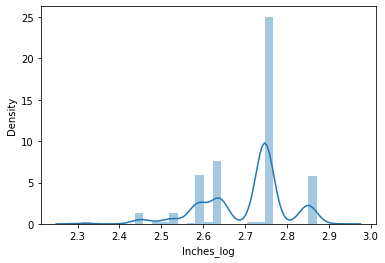

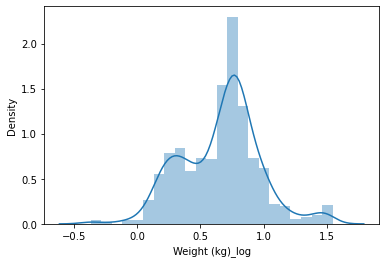

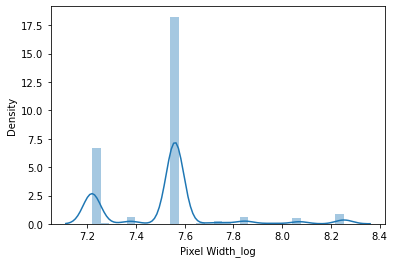

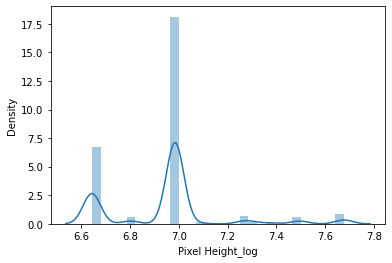

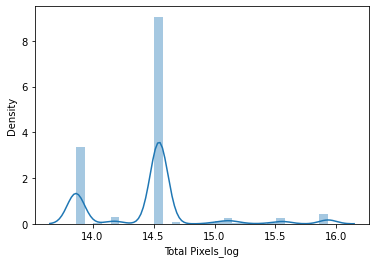

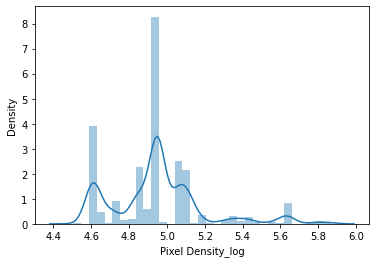

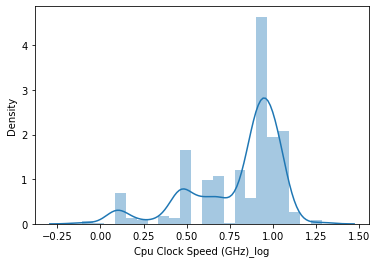

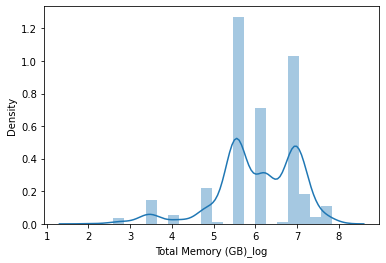

In [15]:
for var in num_feats_log_2:
    sns.distplot(train[var])
    plt.xlabel(var)
    plt.ylabel('Density')
    plt.show()
    

 Now, we will apply the logarithmic transformation to 
 the features in num_feats_log for the test set.

In [16]:
for var in num_feats_log:
    test[var + '_log'] = test[var].apply(np.log)

We will check the shape and the datatypes of the training and tests again.

In [17]:
train.shape

(1039, 37)

In [18]:
train.dtypes

Company                       object
TypeName                      object
Inches                       float64
Ram                           object
OpSys                         object
Weight (kg)                  float64
Price_euros                  float64
Brand                         object
Resolution                    object
Pixel Width                    int64
Pixel Height                   int64
Total Pixels                   int64
Pixel Density                float64
IPS Panel                       bool
Touchscreen                     bool
Cpu Clock Speed (GHz)        float64
Cpu Brand                     object
Simple Cpu Brand              object
Cpu Company                   object
Memory Type                   object
HDD Memory (GB)                int64
Hybrid Memory (GB)             int64
Flash Memory (GB)              int64
SSD Memory (GB)                int64
Total Memory (GB)              int64
Gpu Brand                     object
Simple Gpu Brand              object
G

In [19]:
test.shape

(261, 37)

In [20]:
test.dtypes

Company                       object
TypeName                      object
Inches                       float64
Ram                           object
OpSys                         object
Weight (kg)                  float64
Price_euros                  float64
Brand                         object
Resolution                    object
Pixel Width                    int64
Pixel Height                   int64
Total Pixels                   int64
Pixel Density                float64
IPS Panel                       bool
Touchscreen                     bool
Cpu Clock Speed (GHz)        float64
Cpu Brand                     object
Simple Cpu Brand              object
Cpu Company                   object
Memory Type                   object
HDD Memory (GB)                int64
Hybrid Memory (GB)             int64
Flash Memory (GB)              int64
SSD Memory (GB)                int64
Total Memory (GB)              int64
Gpu Brand                     object
Simple Gpu Brand              object
G

Next, we will scale all the numeric features.

Since we increased the number of numeric features, 
we must update the list of numeric features.

In [21]:
num_feats_2 = train.select_dtypes(include='number').columns.to_list()
num_feats_2

['Inches',
 'Weight (kg)',
 'Price_euros',
 'Pixel Width',
 'Pixel Height',
 'Total Pixels',
 'Pixel Density',
 'Cpu Clock Speed (GHz)',
 'HDD Memory (GB)',
 'Hybrid Memory (GB)',
 'Flash Memory (GB)',
 'SSD Memory (GB)',
 'Total Memory (GB)',
 'Inches_log',
 'Weight (kg)_log',
 'Pixel Width_log',
 'Pixel Height_log',
 'Total Pixels_log',
 'Pixel Density_log',
 'Cpu Clock Speed (GHz)_log',
 'Total Memory (GB)_log']

First, we will scale the numeric features in the training set.

In [22]:
scaler = StandardScaler()
train_scaled = pd.DataFrame(scaler.fit_transform(train[num_feats_2]))

We will compare the first few rows of the numeric features 
with the corresponding rows of the scaled numeric features.

In [23]:
train[num_feats_2].head()

,Inches,Weight (kg),Price_euros,Pixel Width,Pixel Height,Total Pixels,Pixel Density,Cpu Clock Speed (GHz),HDD Memory (GB),Hybrid Memory (GB),...,SSD Memory (GB),Total Memory (GB),Inches_log,Weight (kg)_log,Pixel Width_log,Pixel Height_log,Total Pixels_log,Pixel Density_log,Cpu Clock Speed (GHz)_log,Total Memory (GB)_log
1249,13.3,1.24,1813.0,3200,1800,5760000,276.053530,1.2,0,0,...,256,256,2.587764,0.215111,8.070906,7.495542,15.566448,5.620595,0.182322,5.545177
1186,15.6,2.09,1179.0,1920,1080,2073600,141.211998,2.7,0,0,...,512,512,2.747271,0.737164,7.560080,6.984716,14.544797,4.950262,0.993252,6.238325
568,15.6,2.20,344.0,1920,1080,2073600,141.211998,1.1,500,0,...,0,500,2.747271,0.788457,7.560080,6.984716,14.544797,4.950262,0.095310,6.214608
1251,15.6,1.86,399.0,1366,768,1049088,100.454670,2.5,500,0,...,0,500,2.747271,0.620576,7.219642,6.643790,13.863432,4.609707,0.916291,6.214608
491,13.3,1.05,2799.0,1920,1080,2073600,165.632118,2.7,0,0,...,512,512,2.587764,0.048790,7.560080,6.984716,14.544797,5.109769,0.993252,6.238325


In [24]:
train_scaled.head()

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,-1.208241,-1.212267,1.117392,2.735182,2.649078,2.687147,3.086471,-2.128685,-0.816896,-0.031039,...,0.425703,-0.746811,-1.191224,-1.427602,2.517308,2.447132,2.484779,2.714795,-2.352006,-0.508008
1,0.417235,0.086219,0.142432,0.074570,0.054399,-0.048594,-0.109973,0.811211,-0.816896,-0.031039,...,1.811767,-0.201924,0.442835,0.243700,0.204992,0.184597,0.194914,0.004425,0.754267,0.203772
2,0.417235,0.254259,-1.141625,0.074570,0.054399,-0.048594,-0.109973,-2.324678,0.145062,-0.031039,...,-0.960360,-0.227465,0.442835,0.407910,0.204992,0.184597,0.194914,0.004425,-2.685304,0.179418
3,0.417235,-0.265136,-1.057046,-1.076977,-1.069962,-0.808902,-1.076133,0.419225,0.145062,-0.031039,...,-0.960360,-0.227465,0.442835,-0.129544,-1.336045,-1.325427,-1.332255,-1.372552,0.459467,0.179418
4,-1.208241,-1.502516,2.633655,0.074570,0.054399,-0.048594,0.468911,0.811211,-0.816896,-0.031039,...,1.811767,-0.201924,-1.191224,-1.960064,0.204992,0.184597,0.194914,0.649362,0.754267,0.203772


We need to make sure that the 2 dataframes of numeric features and scaled 
numeric features have the same row and column labels.

In [25]:
train_scaled.columns = train[num_feats_2].columns
train_scaled.index = train[num_feats_2].index
train_scaled.head()

,Inches,Weight (kg),Price_euros,Pixel Width,Pixel Height,Total Pixels,Pixel Density,Cpu Clock Speed (GHz),HDD Memory (GB),Hybrid Memory (GB),...,SSD Memory (GB),Total Memory (GB),Inches_log,Weight (kg)_log,Pixel Width_log,Pixel Height_log,Total Pixels_log,Pixel Density_log,Cpu Clock Speed (GHz)_log,Total Memory (GB)_log
1249,-1.208241,-1.212267,1.117392,2.735182,2.649078,2.687147,3.086471,-2.128685,-0.816896,-0.031039,...,0.425703,-0.746811,-1.191224,-1.427602,2.517308,2.447132,2.484779,2.714795,-2.352006,-0.508008
1186,0.417235,0.086219,0.142432,0.074570,0.054399,-0.048594,-0.109973,0.811211,-0.816896,-0.031039,...,1.811767,-0.201924,0.442835,0.243700,0.204992,0.184597,0.194914,0.004425,0.754267,0.203772
568,0.417235,0.254259,-1.141625,0.074570,0.054399,-0.048594,-0.109973,-2.324678,0.145062,-0.031039,...,-0.960360,-0.227465,0.442835,0.407910,0.204992,0.184597,0.194914,0.004425,-2.685304,0.179418
1251,0.417235,-0.265136,-1.057046,-1.076977,-1.069962,-0.808902,-1.076133,0.419225,0.145062,-0.031039,...,-0.960360,-0.227465,0.442835,-0.129544,-1.336045,-1.325427,-1.332255,-1.372552,0.459467,0.179418
491,-1.208241,-1.502516,2.633655,0.074570,0.054399,-0.048594,0.468911,0.811211,-0.816896,-0.031039,...,1.811767,-0.201924,-1.191224,-1.960064,0.204992,0.184597,0.194914,0.649362,0.754267,0.203772


Now that the unscaled and scaled numeric features have the 
same row and column labels, we will replace the unscaled 
numeric features with the scaled numeric features.

In [26]:
# We will drop the numeric columns from train and replace them with the 
# columns from train_scaled.

train.drop(columns = train_scaled.columns, inplace = True)
train_new = pd.concat([train_scaled, train], axis=1)
train = train_new

We will check the shape and first few rows of the
new training set to make sure it is okay.

In [27]:
train.shape

(1039, 37)

In [28]:
train.head()

,Inches,Weight (kg),Price_euros,Pixel Width,Pixel Height,Total Pixels,Pixel Density,Cpu Clock Speed (GHz),HDD Memory (GB),Hybrid Memory (GB),...,IPS Panel,Touchscreen,Cpu Brand,Simple Cpu Brand,Cpu Company,Memory Type,Gpu Brand,Simple Gpu Brand,Gpu Company,Simple OpSys
1249,-1.208241,-1.212267,1.117392,2.735182,2.649078,2.687147,3.086471,-2.128685,-0.816896,-0.031039,...,False,True,Intel Core i5,Intel Core i5,Intel,SSD,Intel HD Graphics,Intel HD,Intel,Windows
1186,0.417235,0.086219,0.142432,0.074570,0.054399,-0.048594,-0.109973,0.811211,-0.816896,-0.031039,...,False,True,Intel Core i7,Intel Higher,Intel,SSD,Intel HD Graphics,Intel HD,Intel,Windows
568,0.417235,0.254259,-1.141625,0.074570,0.054399,-0.048594,-0.109973,-2.324678,0.145062,-0.031039,...,False,False,Intel Pentium Quad Core,Intel Other,Intel,HDD,Intel HD Graphics,Intel HD,Intel,Windows
1251,0.417235,-0.265136,-1.057046,-1.076977,-1.069962,-0.808902,-1.076133,0.419225,0.145062,-0.031039,...,False,False,AMD A6-Series,AMD,AMD,HDD,AMD Radeon R4,AMD Radeon,AMD,Windows
491,-1.208241,-1.502516,2.633655,0.074570,0.054399,-0.048594,0.468911,0.811211,-0.816896,-0.031039,...,False,True,Intel Core i7,Intel Higher,Intel,SSD,Intel HD Graphics,Intel HD,Intel,Windows


Since the new training set is okay, we will scale the numeric features in the test set.

In [29]:
# Here, we use transform instead of fit_transform because we want to scale
# the test data with the means and standard deviations from the training set.
# Also, we define the index and columns so that the 2 dataframes of numeric
# features and scaled numeric features have the same row and column labels.

test_scaled = pd.DataFrame(
    scaler.transform(test[num_feats_2]),
    index = test[num_feats_2].index,
    columns = test[num_feats_2].columns
)

We will compare the first few rows of the numeric features with the 
corresponding rows of the scaled numeric features. This is to make 
sure that the 2 dataframes of numeric features and scaled numeric 
features have the same row and column labels. 

In [30]:
test[num_feats_2].head()

,Inches,Weight (kg),Price_euros,Pixel Width,Pixel Height,Total Pixels,Pixel Density,Cpu Clock Speed (GHz),HDD Memory (GB),Hybrid Memory (GB),...,SSD Memory (GB),Total Memory (GB),Inches_log,Weight (kg)_log,Pixel Width_log,Pixel Height_log,Total Pixels_log,Pixel Density_log,Cpu Clock Speed (GHz)_log,Total Memory (GB)_log
580,14.0,1.45,389.00,1920,1080,2073600,157.350512,1.1,0,0,...,32,32,2.639057,0.371564,7.560080,6.984716,14.544797,5.058476,0.095310,3.465736
1017,17.3,2.40,2968.00,3840,2160,8294400,254.671349,2.7,0,0,...,512,512,2.850707,0.875469,8.253228,7.677864,15.931091,5.539974,0.993252,6.238325
761,12.5,1.18,1859.00,1920,1080,2073600,176.232574,2.8,0,0,...,256,256,2.525729,0.165514,7.560080,6.984716,14.544797,5.171805,1.029619,5.545177
686,15.6,1.86,612.61,1366,768,1049088,100.454670,2.5,500,0,...,0,500,2.747271,0.620576,7.219642,6.643790,13.863432,4.609707,0.916291,6.214608
186,15.6,2.06,2397.00,3840,2160,8294400,282.423996,2.8,0,0,...,512,512,2.747271,0.722706,8.253228,7.677864,15.931091,5.643409,1.029619,6.238325


In [31]:
test_scaled.head()

,Inches,Weight (kg),Price_euros,Pixel Width,Pixel Height,Total Pixels,Pixel Density,Cpu Clock Speed (GHz),HDD Memory (GB),Hybrid Memory (GB),...,SSD Memory (GB),Total Memory (GB),Inches_log,Weight (kg)_log,Pixel Width_log,Pixel Height_log,Total Pixels_log,Pixel Density_log,Cpu Clock Speed (GHz)_log,Total Memory (GB)_log
580,-0.713531,-0.891464,-1.072424,0.074570,0.054399,-0.048594,0.272594,-2.324678,-0.816896,-0.031039,...,-0.787102,-1.223588,-0.665753,-0.926736,0.204992,0.184597,0.194914,0.441967,-2.685304,-2.643346
1017,1.618674,0.559785,2.893541,4.065489,3.946417,4.567969,2.579602,0.811211,-0.816896,-0.031039,...,1.811767,-0.201924,1.502476,0.686469,3.342609,3.254666,3.302067,2.388818,0.754267,0.203772
761,-1.773624,-1.303924,1.188130,0.074570,0.054399,-0.048594,0.720196,1.007204,-0.816896,-0.031039,...,0.425703,-0.746811,-1.826743,-1.586382,0.204992,0.184597,0.194914,0.900191,0.893573,-0.508008
686,0.417235,-0.265136,-0.728558,-1.076977,-1.069962,-0.808902,-1.076133,0.419225,0.145062,-0.031039,...,-0.960360,-0.227465,0.442835,-0.129544,-1.336045,-1.325427,-1.332255,-1.372552,0.459467,0.179418
186,0.417235,0.040390,2.015462,4.065489,3.946417,4.567969,3.237484,1.007204,-0.816896,-0.031039,...,1.811767,-0.201924,0.442835,0.197413,3.342609,3.254666,3.302067,2.807042,0.893573,0.203772


Now that we know the unscaled and scaled numeric features have the
same row and column labels, we will replace the unscaled numeric 
features with the scaled numeric features.

In [32]:
# We will drop the numeric columns from test and replace them with the 
# columns from test_scaled.

test.drop(columns = test_scaled.columns, inplace = True)
test_new = pd.concat([test_scaled, test], axis=1)
test = test_new

We will check the shape and first few rows of the
new test set to make sure it is okay.

In [33]:
test.shape

(261, 37)

In [34]:
test.head()

,Inches,Weight (kg),Price_euros,Pixel Width,Pixel Height,Total Pixels,Pixel Density,Cpu Clock Speed (GHz),HDD Memory (GB),Hybrid Memory (GB),...,IPS Panel,Touchscreen,Cpu Brand,Simple Cpu Brand,Cpu Company,Memory Type,Gpu Brand,Simple Gpu Brand,Gpu Company,Simple OpSys
580,-0.713531,-0.891464,-1.072424,0.074570,0.054399,-0.048594,0.272594,-2.324678,-0.816896,-0.031039,...,True,False,Intel Celeron Quad Core,Intel Other,Intel,SSD,Intel HD Graphics,Intel HD,Intel,Windows
1017,1.618674,0.559785,2.893541,4.065489,3.946417,4.567969,2.579602,0.811211,-0.816896,-0.031039,...,True,False,Intel Core i7,Intel Higher,Intel,SSD,Nvidia Quadro,Nvidia Quadro,Nvidia,Windows
761,-1.773624,-1.303924,1.188130,0.074570,0.054399,-0.048594,0.720196,1.007204,-0.816896,-0.031039,...,False,False,Intel Core i7,Intel Higher,Intel,SSD,Intel HD Graphics,Intel HD,Intel,Windows
686,0.417235,-0.265136,-0.728558,-1.076977,-1.069962,-0.808902,-1.076133,0.419225,0.145062,-0.031039,...,False,False,Intel Core i5,Intel Core i5,Intel,HDD,AMD Radeon,AMD Radeon,AMD,Windows
186,0.417235,0.040390,2.015462,4.065489,3.946417,4.567969,3.237484,1.007204,-0.816896,-0.031039,...,False,True,Intel Core i7,Intel Higher,Intel,SSD,Nvidia GeForce GTX,Nvidia GeForce,Nvidia,Windows


## 7.2 Categorical Variables

Next, we will look at the categorical variables.  

In [35]:
cat_feats = train.select_dtypes(exclude='number').columns.to_list()
cat_feats

['Company',
 'TypeName',
 'Ram',
 'OpSys',
 'Brand',
 'Resolution',
 'IPS Panel',
 'Touchscreen',
 'Cpu Brand',
 'Simple Cpu Brand',
 'Cpu Company',
 'Memory Type',
 'Gpu Brand',
 'Simple Gpu Brand',
 'Gpu Company',
 'Simple OpSys']

From the Data Exploration and Feature Engineering sections in the previous 
notebook, we can see that some of the categorical variables are ordinal 
variables.  We will use a dictionary and the Pandas replace method to 
transform the ordinal variables into numerical variables.

In [36]:
# Create the dictionary for mapping the ordinal variables.

ord_map_dict = {
    'TypeName': {
    'Netbook': 0,
    'Notebook': 1,
    '2 in 1 Convertible': 2,
    'Ultrabook': 3,
    'Gaming': 4,
    'Workstation': 5
    },
    'Ram': {
        '2GB': 0,
        '4GB': 1,
        '6GB': 2,
        '8GB': 3,
        '12GB': 4,
        '16GB': 5,
        '24GB': 6,
        '32GB': 7,
        '64GB': 8
    },
    'Resolution': {
        '1366 x 768': 0,
        '1440 x 900': 1,
        '1600 x 900': 2,
        '1920 x 1080': 3,
        '1920 x 1200': 4,
        '2160 x 1440': 5,
        '2256 x 1504': 6,
        '2304 x 1440': 7,
        '2400 x 1600': 8,
        '2560 x 1440': 9,
        '2560 x 1600': 10,
        '2736 x 1824': 11,
        '2880 x 1800': 12,
        '3200 x 1800': 13,
        '3840 x 2160': 14
    },
    'IPS Panel': {
        False: 0,
        True: 1
    },
    'Touchscreen': {
        False: 0,
        True: 1
    },
    'Simple Cpu Brand': {
        'Intel Other': 0,
        'AMD': 1,
        'Intel Core i3': 2,
        'Samsung Cortex': 3,
        'Intel Core i5': 4,
        'Intel Higher': 5,
        'AMD Ryzen': 6
    },
    'Cpu Company': {
        'AMD': 0, 
        'Samsung': 1,
        'Intel': 2
    },
    'Memory Type': {
        'HDD': 0,
        'Hybrid': 1,
        'Flash': 2,
        'SSD': 3
    },
    'Gpu Company': {
        'ARM': 0, 
        'AMD': 1, 
        'Intel': 2, 
        'Nvidia': 3
    },
    'Simple OpSys': {
        'Other': 0,
        'No OS': 1,
        'Linux': 2,
        'Windows': 3,
        'Mac': 4
    } 
}

First, we will transform the ordinal variables 
into numerical variables for the training set.

In [37]:
# Map the ordinal variables.

train.replace(to_replace=ord_map_dict, inplace=True)

Now, we will check to make sure there are no 
missing values in the training set.

In [38]:
train.isnull().sum()

Inches                       0
Weight (kg)                  0
Price_euros                  0
Pixel Width                  0
Pixel Height                 0
Total Pixels                 0
Pixel Density                0
Cpu Clock Speed (GHz)        0
HDD Memory (GB)              0
Hybrid Memory (GB)           0
Flash Memory (GB)            0
SSD Memory (GB)              0
Total Memory (GB)            0
Inches_log                   0
Weight (kg)_log              0
Pixel Width_log              0
Pixel Height_log             0
Total Pixels_log             0
Pixel Density_log            0
Cpu Clock Speed (GHz)_log    0
Total Memory (GB)_log        0
Company                      0
TypeName                     0
Ram                          0
OpSys                        0
Brand                        0
Resolution                   0
IPS Panel                    0
Touchscreen                  0
Cpu Brand                    0
Simple Cpu Brand             0
Cpu Company                  0
Memory T

Next, we will transform the ordinal variables 
into numerical variables for the test set.

In [39]:
# Map the ordinal variables.

test.replace(to_replace=ord_map_dict, inplace=True)

Now, we will check to make sure there are no 
missing values in the test set.

In [40]:
test.isnull().sum()

Inches                       0
Weight (kg)                  0
Price_euros                  0
Pixel Width                  0
Pixel Height                 0
Total Pixels                 0
Pixel Density                0
Cpu Clock Speed (GHz)        0
HDD Memory (GB)              0
Hybrid Memory (GB)           0
Flash Memory (GB)            0
SSD Memory (GB)              0
Total Memory (GB)            0
Inches_log                   0
Weight (kg)_log              0
Pixel Width_log              0
Pixel Height_log             0
Total Pixels_log             0
Pixel Density_log            0
Cpu Clock Speed (GHz)_log    0
Total Memory (GB)_log        0
Company                      0
TypeName                     0
Ram                          0
OpSys                        0
Brand                        0
Resolution                   0
IPS Panel                    0
Touchscreen                  0
Cpu Brand                    0
Simple Cpu Brand             0
Cpu Company                  0
Memory T

Later on, I discovered that I could reduce the training and test errors 
by removing Company and Brand.  I will remove them now instead.

In [41]:
train.drop(['Brand', 'Company'], axis=1, inplace=True)
test.drop(['Brand', 'Company'], axis=1, inplace=True)

Since we decreased the number of categorical features, 
we must update the list of categorical features.

In [42]:
cat_feats_2 = train.select_dtypes(exclude='number').columns.to_list()
cat_feats_2

['OpSys', 'Cpu Brand', 'Gpu Brand', 'Simple Gpu Brand']

Now, we will one-hot encode the remaining categorical variables.

In [43]:
train_dummy = pd.get_dummies(train[cat_feats_2])
test_dummy = pd.get_dummies(test[cat_feats_2])

We will check the shapes of train_dummy and test_dummy.  From the previous 
notebook, we know that for some of the categorical variables, the set of 
values in the test set is not equal to the set of values in the training set.
Thus, train_dummy and test_dummy will contain different dummy variables and 
their shapes will be different.

In [44]:
print("Shape of train_dummy:",  train_dummy.shape)
print("Shape of test_dummy:", test_dummy.shape)

Shape of train_dummy: (1039, 55)
Shape of test_dummy: (261, 42)


In order to make train_dummy and test_dummy have the same columns, 
first we need a list of all the columns in both dataframes.

In [45]:
# Set of columns in train_dummy.shape
train_dummy_cols_set = set(train_dummy.columns) 

# Set of columns in test_dummy.shape
test_dummy_cols_set = set(train_dummy.columns) 

# Set of all columns in both dataframes
total_cols_set = (train_dummy_cols_set | test_dummy_cols_set)

# List of all columns
total_cols_list = list(total_cols_set)
total_cols_list.sort() # Sorting the list alphabetically.
total_cols_list

['Cpu Brand_AMD A10-Series',
 'Cpu Brand_AMD A12-Series',
 'Cpu Brand_AMD A4-Series',
 'Cpu Brand_AMD A6-Series',
 'Cpu Brand_AMD A8-Series',
 'Cpu Brand_AMD A9-Series',
 'Cpu Brand_AMD E-Series',
 'Cpu Brand_AMD FX',
 'Cpu Brand_AMD Ryzen',
 'Cpu Brand_Intel Atom',
 'Cpu Brand_Intel Celeron Dual Core',
 'Cpu Brand_Intel Celeron Quad Core',
 'Cpu Brand_Intel Core M',
 'Cpu Brand_Intel Core i3',
 'Cpu Brand_Intel Core i5',
 'Cpu Brand_Intel Core i7',
 'Cpu Brand_Intel Pentium Dual Core',
 'Cpu Brand_Intel Pentium Quad Core',
 'Cpu Brand_Intel Xeon',
 'Cpu Brand_Samsung Cortex',
 'Gpu Brand_AMD FirePro',
 'Gpu Brand_AMD Radeon',
 'Gpu Brand_AMD Radeon Pro',
 'Gpu Brand_AMD Radeon R2',
 'Gpu Brand_AMD Radeon R3',
 'Gpu Brand_AMD Radeon R4',
 'Gpu Brand_AMD Radeon R5',
 'Gpu Brand_AMD Radeon R7',
 'Gpu Brand_AMD Radeon R9',
 'Gpu Brand_AMD Radeon RX',
 'Gpu Brand_ARM Mali',
 'Gpu Brand_Intel HD Graphics',
 'Gpu Brand_Intel Iris Plus Graphics',
 'Gpu Brand_Intel Iris Pro Graphics',
 'Gpu Br

In [46]:
print("Total number of columns in both train_dummy and test_dummy:", 
      len(total_cols_list))

Total number of columns in both train_dummy and test_dummy: 55


Now, we will use the Pandas reindexing method to make sure that train_dummy
and test_dummy have the same columnns.  We will set the fill value to zero
so that any missing values are replaced by zero.

In [47]:
train_dummy.reindex(columns=total_cols_list, copy=False, fill_value=0)

,Cpu Brand_AMD A10-Series,Cpu Brand_AMD A12-Series,Cpu Brand_AMD A4-Series,Cpu Brand_AMD A6-Series,Cpu Brand_AMD A8-Series,Cpu Brand_AMD A9-Series,Cpu Brand_AMD E-Series,Cpu Brand_AMD FX,Cpu Brand_AMD Ryzen,Cpu Brand_Intel Atom,...,OpSys_Windows 7,OpSys_macOS,Simple Gpu Brand_AMD FirePro,Simple Gpu Brand_AMD Radeon,Simple Gpu Brand_ARM Mali,Simple Gpu Brand_Intel HD,Simple Gpu Brand_Intel Iris,Simple Gpu Brand_Intel UHD,Simple Gpu Brand_Nvidia GeForce,Simple Gpu Brand_Nvidia Quadro
1249,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1186,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
568,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1251,0,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
491,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
763,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
835,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1216,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
559,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [48]:
test_dummy = test_dummy.reindex(
    columns=total_cols_list,
    fill_value=0)

In [49]:
test_dummy.shape

(261, 55)

Now, we need to drop the categorical features from the training and test sets.

In [50]:
train.drop(cat_feats_2, axis=1, inplace=True)
train.dtypes

Inches                       float64
Weight (kg)                  float64
Price_euros                  float64
Pixel Width                  float64
Pixel Height                 float64
Total Pixels                 float64
Pixel Density                float64
Cpu Clock Speed (GHz)        float64
HDD Memory (GB)              float64
Hybrid Memory (GB)           float64
Flash Memory (GB)            float64
SSD Memory (GB)              float64
Total Memory (GB)            float64
Inches_log                   float64
Weight (kg)_log              float64
Pixel Width_log              float64
Pixel Height_log             float64
Total Pixels_log             float64
Pixel Density_log            float64
Cpu Clock Speed (GHz)_log    float64
Total Memory (GB)_log        float64
TypeName                       int64
Ram                            int64
Resolution                     int64
IPS Panel                      int64
Touchscreen                    int64
Simple Cpu Brand               int64
C

In [51]:
test.drop(cat_feats_2, axis=1, inplace=True)
test.dtypes

Inches                       float64
Weight (kg)                  float64
Price_euros                  float64
Pixel Width                  float64
Pixel Height                 float64
Total Pixels                 float64
Pixel Density                float64
Cpu Clock Speed (GHz)        float64
HDD Memory (GB)              float64
Hybrid Memory (GB)           float64
Flash Memory (GB)            float64
SSD Memory (GB)              float64
Total Memory (GB)            float64
Inches_log                   float64
Weight (kg)_log              float64
Pixel Width_log              float64
Pixel Height_log             float64
Total Pixels_log             float64
Pixel Density_log            float64
Cpu Clock Speed (GHz)_log    float64
Total Memory (GB)_log        float64
TypeName                       int64
Ram                            int64
Resolution                     int64
IPS Panel                      int64
Touchscreen                    int64
Simple Cpu Brand               int64
C

Note that the training and test sets now only contain numerical variables.  
We will add the dummy variables to the training and test sets later on.

# Step 8: Variable Selection

First, we will look at the shapes of the training and test sets.

In [52]:
print("Shape of train:",  train.shape)
print("Shape of test:", test.shape)

Shape of train: (1039, 31)
Shape of test: (261, 31)


Next, we will separate the target variable 
Price_euros from the other variables.

In [53]:
y_train = train['Price_euros']
train.drop('Price_euros', axis=1, inplace=True)
train.shape

(1039, 30)

In [54]:
y_test = test['Price_euros']
test.drop('Price_euros', axis=1, inplace=True)
test.shape

(261, 30)

## 8.1 Remove Features With Small Variance

First, we will remove all variables with little variance.

In [55]:
vt = VarianceThreshold(0.1)
train_transformed = vt.fit_transform(train)

In [56]:
train_transformed

array([[-1.20824085, -1.21226664,  2.73518232, ...,  3.        ,
         2.        ,  3.        ],
       [ 0.41723523,  0.08621923,  0.07456966, ...,  3.        ,
         2.        ,  3.        ],
       [ 0.41723523,  0.25425857,  0.07456966, ...,  0.        ,
         2.        ,  3.        ],
       ...,
       [ 1.61867408,  1.93465205, -0.59058351, ...,  0.        ,
         3.        ,  3.        ],
       [ 0.41723523,  0.22370597, -1.07697676, ...,  0.        ,
         1.        ,  3.        ],
       [-1.20824085, -1.28864816,  0.07456966, ...,  3.        ,
         2.        ,  3.        ]])

In [57]:
train_transformed.shape

(1039, 30)

No features have been removed because the shape 
of train_transformed is the same as train.

## 8.2 Remove Correlated Features

First, we will calculate the correlation matrix except here the values
are the absolute values of the correlation coefficients.

In [58]:
corr_mat_abs = train.corr().abs()

Next, we will find pairs of highly correlated features.

In [59]:
indices = np.where(corr_mat_abs > 0.8) 
indices = [(corr_mat_abs.index[x], corr_mat_abs.columns[y])
           for x, y in zip(*indices) if x != y and x < y]

Next, we will remove one feature from each pair of highly correlated features.

In [60]:
for idx in indices: #each pair
    try:
        train.drop(idx[1], axis = 1, inplace=True)
    except KeyError:
        pass

In [61]:
# Check the new shape of the training set.
train.shape

(1039, 15)

In [62]:
# List the new columns.
train.columns

Index(['Inches', 'Pixel Width', 'Cpu Clock Speed (GHz)', 'HDD Memory (GB)',
       'Hybrid Memory (GB)', 'Flash Memory (GB)', 'SSD Memory (GB)',
       'TypeName', 'Ram', 'IPS Panel', 'Touchscreen', 'Simple Cpu Brand',
       'Cpu Company', 'Gpu Company', 'Simple OpSys'],
      dtype='object')

Now, we will use the Pandas reindexing method to make sure that
the test set has the same columns as the training set.

In [63]:
test = test.reindex(columns=train.columns)

## 8.3 Forward Regression

Now, we will select the ten best features using forward regression.

In [64]:
skb = SelectKBest(f_regression, k=10)
train_transformed_2 = skb.fit_transform(train, y_train)

Since train_transformed_2 is an array, we have to transform it back into
a dataframe.  We will use the the method get_support() from the SelectKBest 
instance to find the selected features.

In [65]:
# Selected columns
train_new_cols = train.columns[skb.get_support()]

train_transformed_2 = pd.DataFrame(
    train_transformed_2,
    index = train.index,
    columns = train_new_cols
)

In [66]:
# List the new columns
train_new_cols

Index(['Pixel Width', 'Cpu Clock Speed (GHz)', 'SSD Memory (GB)', 'TypeName',
       'Ram', 'IPS Panel', 'Simple Cpu Brand', 'Cpu Company', 'Gpu Company',
       'Simple OpSys'],
      dtype='object')

Now, we will use the Pandas reindexing method to make sure that
the test set has the same columns as the training set.

In [67]:
test = test.reindex(columns=train_transformed_2.columns)

Before we proceed to the next section, we have to add 
the dummy variables back to the training and test sets.

In [68]:
X_train = pd.concat([train_transformed_2, train_dummy], axis=1)
X_train.shape

(1039, 65)

In [69]:
X_test = pd.concat([test, test_dummy], axis=1)
X_test.shape

(261, 65)

# Step 9: Model Building

## 9.1 Choose an Error Metric

The main metric that we will be using is Mean Squared Error (MSE).  
We will also look at Root Mean Squared Error (RMSE), Mean Absolute Error 
(MAE), $R^2$ score and adjusted $R^2$ score.

## 9.2 Build a Baseline Model

In [70]:
# For the baseline model, we will use the DummyRegressor model from sklearn.
# Then, we will fit the baseline model to the data.

base = DummyRegressor(strategy = 'mean')
base.fit(X_train, y_train)

DummyRegressor()

In [71]:
# Compute the predictions for the training and test sets.

y_pred_base_train = base.predict(X_train)
y_pred_base_test = base.predict(X_test)

In [72]:
# Compute the training and test scores.

# MSE
MSE_b_train = mean_squared_error(y_train, y_pred_base_train)
MSE_b_test = mean_squared_error(y_test, y_pred_base_test)

# RMSE
RMSE_b_train = mean_squared_error(y_train, y_pred_base_train, squared=False)
RMSE_b_test = mean_squared_error(y_test, y_pred_base_test, squared=False)

# MAE
MAE_b_train = mean_absolute_error(y_train, y_pred_base_train)
MAE_b_test = mean_absolute_error(y_test, y_pred_base_test)

# R^2 score
r2_b_train = r2_score(y_train, y_pred_base_train)
r2_b_test = r2_score(y_test, y_pred_base_test)

# Adjusted R^2 score
n_train = len(y_train)
p_train = len(X_train.columns)
adj_r2_b_train = 1 - ((1 - r2_b_train) 
                      * (n_train - 1) 
                      / (n_train - p_train - 1))

n_test = len(y_test)
p_test = len(X_test.columns)
adj_r2_b_test = 1 - ((1 - r2_b_test) 
                     * (n_test - 1) 
                     / (n_test - p_test - 1))

In [73]:
print(f"The training MSE is {MSE_b_train}.")
print(f"The test MSE is {MSE_b_test}.\n")
print(f"The training RMSE is {RMSE_b_train}.")
print(f"The test RMSE is {RMSE_b_test}.\n")
print(f"The training MAE is {MAE_b_train}.")
print(f"The test MAE is {MAE_b_test}.\n")
print(f"The training R squared score is {r2_b_train}.")
print(f"The test R squared score  is {r2_b_test}.\n")
print(f"The training adjusted R squared score is {adj_r2_b_train}.")
print(f"The test adjusted R squared score  is {adj_r2_b_test}.\n")

The training MSE is 1.0.
The test MSE is 1.4434316204323823.

The training RMSE is 1.0.
The test RMSE is 1.2014289910071183.

The training MAE is 0.7868575632752502.
The test MAE is 0.8702754644401661.

The training R squared score is 0.0.
The test R squared score  is -0.03693482525494174.

The training adjusted R squared score is -0.06680369989722501.
The test adjusted R squared score  is -0.38257976700658913.



## 9.2 Build a Linear Model

In [74]:
# We will use the LinearRegression model from sklearn 
# and fit the model to the data.

lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [75]:
# Compute the predictions for the training and test sets.

y_pred_lm_train = lm.predict(X_train)
y_pred_lm_test = lm.predict(X_test)

In [76]:
# Compute the training and test scores.

# MSE
MSE_lm_train = mean_squared_error(y_train, y_pred_lm_train)
MSE_lm_test = mean_squared_error(y_test, y_pred_lm_test)

# RMSE
RMSE_lm_train = mean_squared_error(y_train, y_pred_lm_train, squared=False)
RMSE_lm_test = mean_squared_error(y_test, y_pred_lm_test, squared=False)

# MAE
MAE_lm_train = mean_absolute_error(y_train, y_pred_lm_train)
MAE_lm_test = mean_absolute_error(y_test, y_pred_lm_test)

# R^2 score
r2_lm_train = r2_score(y_train, y_pred_lm_train)
r2_lm_test = r2_score(y_test, y_pred_lm_test)

# Adjusted R^2 score
n_train = len(y_train)
p_train = len(X_train.columns)
adj_r2_lm_train = 1 - ((1 - r2_lm_train) 
                      * (n_train - 1) 
                      / (n_train - p_train - 1))

n_test = len(y_test)
p_test = len(X_test.columns)
adj_r2_lm_test = 1 - ((1 - r2_lm_test) 
                     * (n_test - 1) 
                     / (n_test - p_test - 1))

In [77]:
print(f"The training MSE is {MSE_lm_train}.")
print(f"The test MSE is {MSE_lm_test}.\n")
print(f"The training RMSE is {RMSE_lm_train}.")
print(f"The test RMSE is {RMSE_lm_test}.\n")
print(f"The training MAE is {MAE_lm_train}.")
print(f"The test MAE is {MAE_lm_test}.\n")
print(f"The training R squared score is {r2_lm_train}.")
print(f"The test R squared score  is {r2_lm_test}.\n")
print(f"The training adjusted R squared score is {adj_r2_lm_train}.")
print(f"The test adjusted R squared score  is {adj_r2_lm_test}.\n")

The training MSE is 0.2192069293418263.
The test MSE is 0.8128766314983287.

The training RMSE is 0.46819539654061776.
The test RMSE is 0.9015967122268851.

The training MAE is 0.3411924897324334.
The test MAE is 0.6841841848096609.

The training R squared score is 0.7807930706581737.
The test R squared score  is 0.4160443238841802.

The training adjusted R squared score is 0.7661492367350301.
The test adjusted R squared score  is 0.22139243184557367.

